# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-04 10:03:28.692447: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 10:03:28.695474: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 10:03:28.727904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 10:03:29.530253: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=10, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 576,768 parameters ready.


Epoch 1/4: accuracy 8.800%
Epoch 2/4: accuracy 9.100%
Epoch 3/4: accuracy 9.100%
Epoch 4/4: accuracy 9.100%

 [[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1  1 -1 ...  1 -1  1]
 ...
 [ 1  1  1 ... -1 -1  1]
 [-1 -1 -1 ...  1  1 -1]
 [-1  1 -1 ... -1  1  1]]

 [[ 0  3  0 ...  7  0  0]
 [10  0  7 ...  4  0 10]
 [ 0  7  0 ...  3  5  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


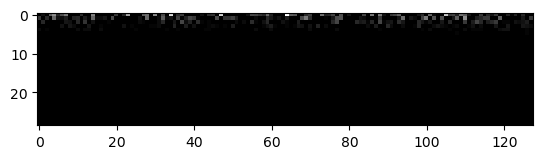

In [6]:
model.fit(train_images, train_labels, epochs=4)
# plt.imshow(model.hidden_weights[0])
# print("\n", model.input_weights[0][:16])
print("\n", model.hidden_weights[0])
# print("\n", model.output_weights)
print("\n", model.last_intermediate_outputs)
plt.imshow(model.last_intermediate_outputs, cmap="gray")
# print("\n", model.last_outputs)
# plt.imshow([model.last_outputs], cmap="gray")